# Predicting Fuel Efficiency of Vehicles


### Step 1: Collecting Data from UCI ML repository

In [16]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

In [18]:
data.sample(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
376,37.0,4,91.0,68.0,2025.0,18.2,82,3
185,26.0,4,98.0,79.0,2255.0,17.7,76,1
39,14.0,8,400.0,175.0,4464.0,11.5,71,1
208,13.0,8,318.0,150.0,3940.0,13.2,76,1
276,21.6,4,121.0,115.0,2795.0,15.7,78,2
349,34.1,4,91.0,68.0,1985.0,16.0,81,3
214,13.0,8,302.0,130.0,3870.0,15.0,76,1
233,29.0,4,97.0,78.0,1940.0,14.5,77,2
61,21.0,4,122.0,86.0,2226.0,16.5,72,1
346,32.3,4,97.0,67.0,2065.0,17.8,81,3


In [19]:
##checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [20]:
##checking for all the null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [21]:
##summary statistics of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


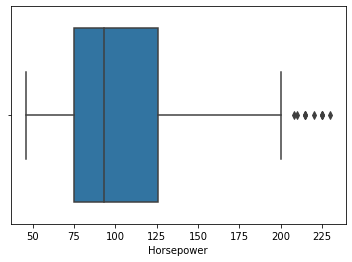

In [22]:
sns.boxplot(x=data['Horsepower'])

In [23]:
##imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [24]:
##category distribution
data["Cylinders"].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [25]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

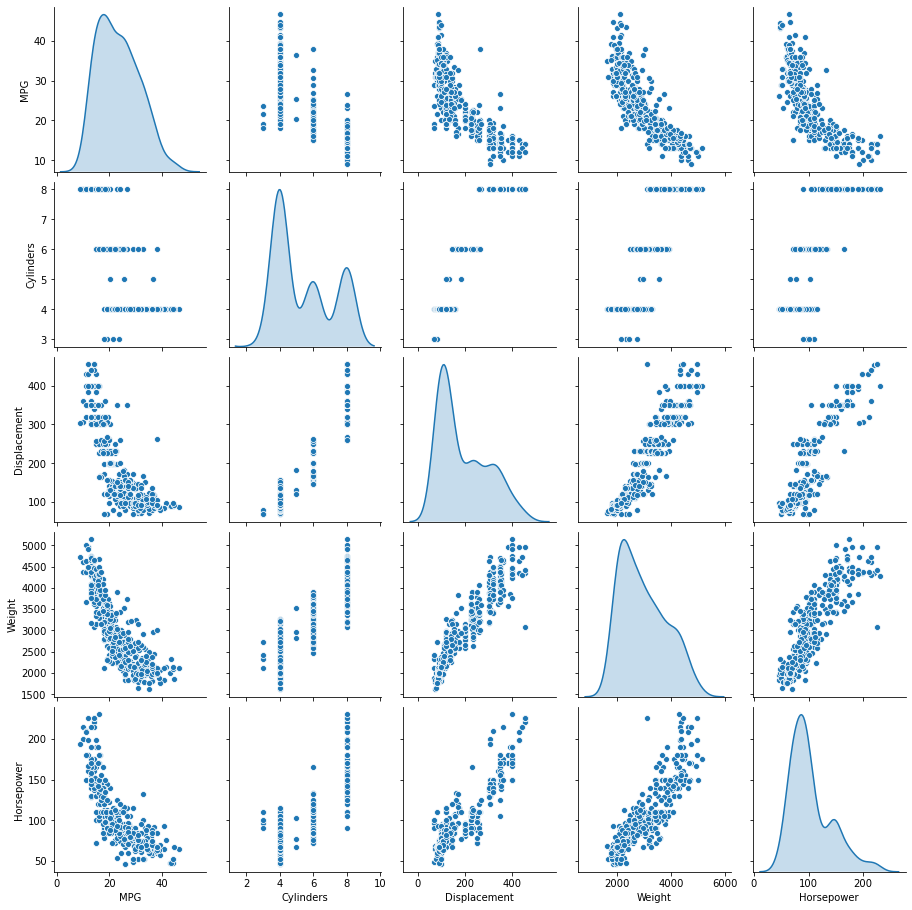

In [26]:
##pairplots to get an intuition of potential correlations
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")


### Setting aside Test Set

In [27]:
# set aside the test data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

test_set.shape

(80, 8)

In [28]:
train_set['Cylinders'].value_counts() / len(train_set)

4    0.509434
8    0.248428
6    0.220126
3    0.012579
5    0.009434
Name: Cylinders, dtype: float64

In [29]:
test_set["Cylinders"].value_counts() / len(test_set)

4    0.525
8    0.300
6    0.175
Name: Cylinders, dtype: float64

### Stratified Sampling

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [31]:
strat_test_set.shape

(80, 8)

In [32]:
##checking for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [33]:
##checking for cylinder category distribution in testing set
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [34]:
##converting integer classes to countries in Origin column
train_set['Origin'] = train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
train_set.sample(10)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
8,14.0,8,455.0,225.0,4425.0,10.0,70,India
138,14.0,8,318.0,150.0,4457.0,13.5,74,India
150,26.0,4,108.0,93.0,2391.0,15.5,74,Germany
279,29.5,4,98.0,68.0,2135.0,16.6,78,Germany
311,32.1,4,98.0,70.0,2120.0,15.5,80,India
139,14.0,8,302.0,140.0,4638.0,16.0,74,India
145,32.0,4,83.0,61.0,2003.0,19.0,74,Germany
213,13.0,8,350.0,145.0,4055.0,12.0,76,India
71,19.0,3,70.0,97.0,2330.0,13.5,72,Germany
281,19.8,6,200.0,85.0,2990.0,18.2,79,India


In [35]:
##one hot encoding
train_set = pd.get_dummies(train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,1,0
18,27.0,4,97.0,88.0,2130.0,14.5,70,1,0,0
376,37.0,4,91.0,68.0,2025.0,18.2,82,1,0,0
248,36.1,4,91.0,60.0,1800.0,16.4,78,1,0,0
177,23.0,4,115.0,95.0,2694.0,15.0,75,0,0,1


In [36]:
data = strat_train_set.copy()

### Checking correlation matrix w.r.t. MPG

In [37]:
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG             1.000000
Origin          0.582654
Model Year      0.577636
Acceleration    0.411989
Cylinders      -0.765693
Horsepower     -0.776055
Displacement   -0.800063
Weight         -0.822723
Name: MPG, dtype: float64

### Testing new variables by checking their correlation w.r.t. MPG

1. Displacement on Power
2. Weight on cylinder
3. Acceleration on power
4. Acceleration on cylinder

In [38]:
## testing new variables by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)


MPG                      1.000000
acceleration_on_cyl      0.718888
acceleration_on_power    0.696610
Origin                   0.582654
Model Year               0.577636
Acceleration             0.411989
weight_on_cylinder       0.002289
displacement_on_power   -0.564561
Cylinders               -0.765693
Horsepower              -0.776055
Displacement            -0.800063
Weight                  -0.822723
Name: MPG, dtype: float64

In [39]:
##handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([2.23500000e+01, 4.00000000e+00, 1.46000000e+02, 9.35000000e+01,
       2.84400000e+03, 1.55000000e+01, 7.60000000e+01, 1.00000000e+00,
       1.67609819e+00, 5.45187500e+02, 1.70795455e-01, 3.50000000e+00])

In [41]:
data.median().values

array([2.23500000e+01, 4.00000000e+00, 1.46000000e+02, 9.35000000e+01,
       2.84400000e+03, 1.55000000e+01, 7.60000000e+01, 1.00000000e+00,
       1.67609819e+00, 5.45187500e+02, 1.70795455e-01, 3.50000000e+00])

In [42]:
X = imputer.transform(data)

In [43]:
data_tr = pd.DataFrame(X, columns=data.columns,
                          index=data.index)